### **Assignment #9**

In this assignment, you learn how to use matrix product states (MPS) to compress fully
connected layers and perform simple MPS contractions. 
Instead of compressing a weight matrix of a fully connected layer, we will consider the compression of a large image, which can also be nicely visualized.

Download a large [image](https://www.publicdomainpictures.net/pictures/540000/velka/seamless-flowers-pattern-16952868310zL.jpg), convert it to a grayscale, and
resize it such that the height will be 4096 by keeping the aspect ratio constant. Finally,
crop the image to the size 4096 × 4096 and convert it to a NumPy array A.

Write a method that compresses the image by transforming it to a matrix product
state with a fixed bond dimension D.

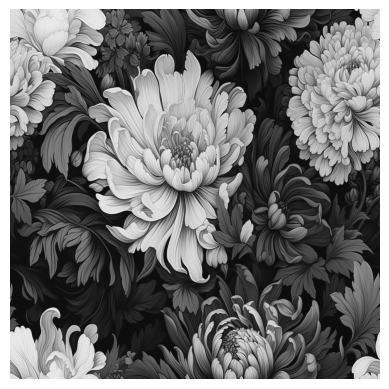

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = mpimg.imread('test_img.jpg', )
gray = np.mean(img, axis=-1)
og_img = np.array(Image.fromarray(gray).resize((4096, 4096)))
plt.imshow(og_img, 'gray')
plt.axis('off')
plt.show()

In [2]:
def compress(img, comp_D, n_tmp):
    t1 = np.reshape(img, [2]*24)
    t2 = np.transpose(t1, [i + j*12 for i in range(n_tmp) for j in range(2)])
    t3 = np.reshape(t2, [4]*12)

    mps = []

    a = t3
    dr = 1
    for i in range(len(t3.shape)-1):
        a = np.reshape(a, [4*dr, 4**(11-i)])
        u, s, v = np.linalg.svd(a, full_matrices=False)
        dr = min(len(s), comp_D)
        u = u[:, :dr]
        s = s[:dr]
        v = v[:dr, :]
        
        u1, u2 = u.shape
        u11 = u1//4
        u12 = u1//u11
        mps.append(u.reshape(u11, u12, u2))

        a = np.einsum("i,ij->ij", s, v)

    a1, a2 = a.shape
    a22 = a2//4
    a21 = a2//a22
    mps.append(a.reshape(a1, a21, a22))
    return mps

Write a function that transforms the MPS back to the original dimensions.
You have to perform the reshape and transpose operations in the reverse order as in
the previous exercise.

In [3]:
def decompress(mps, n_tmp):
    t3 = [[1]]

    for alpha in mps:
        t3 = np.einsum("...i,ijk->...jk", t3, alpha)

    t2_ = np.reshape(t3, [2]*24)
    t1_ = np.transpose(t2_, [i for i in range(0, n_tmp*2, 2)] + [i for i in range(1, n_tmp*2, 2)])
    t0_ = np.reshape(t1_, [2**12]*2)  
    return t0_

Calculate the number of parameters in the compressed MPS. Visually compare the
obtained MPS compressed image with the simple SVD compressed image with the
same number of parameters.

In [4]:
n_tmp = int(np.log2(4096))
mps_train = compress(og_img, 64, n_tmp)
mps = decompress(mps_train, n_tmp)
sum = 0
for alpha in mps_train:
    sum += alpha.size
    print(alpha.size, alpha.shape)
print(f"Original amount: {og_img.size}, Compressed amount: {sum}, ratio: {sum/og_img.size}")

16 (1, 4, 4)
256 (4, 4, 16)
4096 (16, 4, 64)
16384 (64, 4, 64)
16384 (64, 4, 64)
16384 (64, 4, 64)
16384 (64, 4, 64)
16384 (64, 4, 64)
16384 (64, 4, 64)
4096 (64, 4, 16)
256 (16, 4, 4)
16 (4, 4, 1)
Original amount: 16777216, Compressed amount: 107040, ratio: 0.0063800811767578125


In [5]:
n_tmp = int(np.log2(4096))
mps_train = compress(og_img, 128, n_tmp)
mps = decompress(mps_train, n_tmp)
sum = 0
for alpha in mps_train:
    sum += alpha.size
    print(alpha.size, alpha.shape)
print(f"Original amount: {og_img.size}, Compressed amount: {sum}, ratio: {sum/og_img.size}")

16 (1, 4, 4)
256 (4, 4, 16)
4096 (16, 4, 64)
32768 (64, 4, 128)
65536 (128, 4, 128)
65536 (128, 4, 128)
65536 (128, 4, 128)
65536 (128, 4, 128)
32768 (128, 4, 64)
4096 (64, 4, 16)
256 (16, 4, 4)
16 (4, 4, 1)
Original amount: 16777216, Compressed amount: 336416, ratio: 0.020051956176757812


In [6]:
n_tmp = int(np.log2(4096))
mps_train = compress(og_img, 256, n_tmp)
mps = decompress(mps_train, n_tmp)
sum = 0
for alpha in mps_train:
    sum += alpha.size
    print(alpha.size, alpha.shape)
print(f"Original amount: {og_img.size}, Compressed amount: {sum}, ratio: {sum/og_img.size}")

16 (1, 4, 4)
256 (4, 4, 16)
4096 (16, 4, 64)
65536 (64, 4, 256)
262144 (256, 4, 256)
262144 (256, 4, 256)
262144 (256, 4, 256)
262144 (256, 4, 256)
65536 (256, 4, 64)
4096 (64, 4, 16)
256 (16, 4, 4)
16 (4, 4, 1)
Original amount: 16777216, Compressed amount: 1188384, ratio: 0.07083320617675781


In [7]:
n_tmp = int(np.log2(4096))
mps_train = compress(og_img, 512, n_tmp)
mps = decompress(mps_train, n_tmp)
sum = 0
for alpha in mps_train:
    sum += alpha.size
    print(alpha.size, alpha.shape)
print(f"Original amount: {og_img.size}, Compressed amount: {sum}, ratio: {sum/og_img.size}")

16 (1, 4, 4)
256 (4, 4, 16)
4096 (16, 4, 64)
65536 (64, 4, 256)
524288 (256, 4, 512)
1048576 (512, 4, 512)
1048576 (512, 4, 512)
524288 (512, 4, 256)
65536 (256, 4, 64)
4096 (64, 4, 16)
256 (16, 4, 4)
16 (4, 4, 1)
Original amount: 16777216, Compressed amount: 3285536, ratio: 0.1958332061767578


Analyze the compression factor and the error of the compression as a function of
the bond dimension, namely the size of the matrices in the MPS. Compare the errors
obtained with the MPS and SVD compressed images as a function of the compression
factor. Why is the MPS compression better? Isn’t SVD an optimal decomposition
concerning the 2-norm?

In [8]:
def svd_compression(img, comp_D):
    u, s, v = np.linalg.svd(img, full_matrices=False)

    u = u[:, :comp_D]
    s = s[:comp_D]
    v = v[:comp_D, :]

    reconstruct = u @ (np.identity(comp_D) * s) @ v

    print(f"SVD compression: {u.size+s.size+v.size}")
    print(f"SVD comp. factor: {(u.size+s.size+v.size)/img.size}")

    return np.clip(reconstruct, 0, 255).astype(np.uint8)

In [9]:
svd = svd_compression(og_img, 64)

SVD compression: 524352
SVD comp. factor: 0.031253814697265625


In [10]:
svd = svd_compression(og_img, 128)

SVD compression: 1048704
SVD comp. factor: 0.06250762939453125


In [11]:
svd = svd_compression(og_img, 256)

SVD compression: 2097408
SVD comp. factor: 0.1250152587890625


In [12]:
svd = svd_compression(og_img, 512)

SVD compression: 4194816
SVD comp. factor: 0.250030517578125


| maxD | MPS Compression ratio | SVD Compression ratio |
| --- | --- | --- |
| 64  | 0.00638 | 0.03125 |
| 128 | 0.02005 | 0.06250 |
| 256 | 0.07083 | 0.12501 |
| 512 | 0.19583 | 0.25003 |

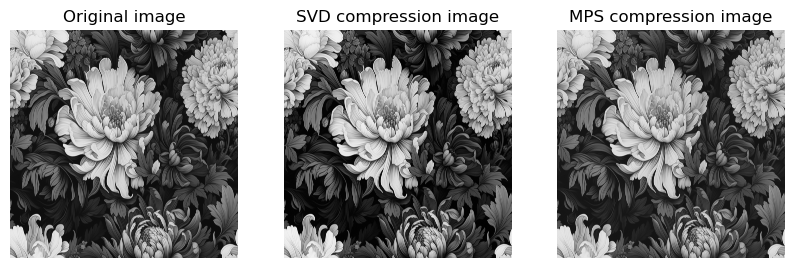

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.imshow(og_img, 'gray')
plt.axis('off')
plt.title("Original image")
plt.subplot(1, 3, 2)
plt.imshow(svd, 'gray')
plt.axis('off')
plt.title("SVD compression image")
plt.subplot(1, 3, 3)
plt.imshow(mps, 'gray')
plt.axis('off')
plt.title("MPS compression image")
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

mse0 = mean_squared_error(og_img, og_img)
mse1 = mean_squared_error(og_img, mps)
mse2 = mean_squared_error(og_img, svd)
print(f"MSE: control \t {mse0}")
print(f"MSE: MPS \t {mse1}")
print(f"MSE: SVD \t {mse2}")

MSE: control 	 0.0
MSE: MPS 	 12.93036490744591
MSE: SVD 	 16.164112091064453


**BONUS**:
Write an efficient sequential method to calculate the 2-norm of an MPS and compare
it to np.linalg.norm method for the original matrix.

In [15]:
import time
def norm2_mps(mps_train):
    a = mps_train[0]
    b = np.einsum("ijk,ijl->kl", a, a)
    for a in mps_train[1:]:
        c = np.einsum("kl,kij->lij", b, a)
        b = np.einsum("lij,lin->jn", c, a)
    return np.sqrt(b[0, 0])
s = time.time()
mps_norm = norm2_mps(mps_train)
print("MPS 2nd norm time:\t", time.time()-s)
s = time.time()
og_norm = np.linalg.norm(mps)
print("NP 2nd norm time:\t", time.time()-s)
print("Original 2-norm:", og_norm)
print("MPS 2-norm:", mps_norm)

MPS 2nd norm time:	 8.02422022819519
NP 2nd norm time:	 0.016208648681640625
Original 2-norm: 504846.78661005833
MPS 2-norm: 504844.1
